<a href="https://colab.research.google.com/github/Darshan0805/AML-Project/blob/main/2348548_Program_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/program_5_dataset - program_5_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-81-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

In [ ]:
X_simple = df[['CREA']]
y_simple = df['PROT']

In [ ]:
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)
print(f"Simple Linear Regression - Coefficient: {model_simple.coef_[0]}, Intercept: {model_simple.intercept_}")

Simple Linear Regression - Coefficient: -0.003483893152979068, Intercept: 72.32727972675376


In [ ]:
y_train_pred_simple = model_simple.predict(X_simple)
train_mse_simple = mean_squared_error(y_simple, y_train_pred_simple)
train_r2_simple = r2_score(y_simple, y_train_pred_simple)
X_test_simple = X_test[['CREA']]
y_test_pred_simple = model_simple.predict(X_test_simple)
test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_r2_simple = r2_score(y_test, y_test_pred_simple)
print(f"Simple Linear Regression Metrics:")
print(f"Train Mean Squared Error (MSE): {train_mse_simple}")
print(f"Train R-squared (R2): {train_r2_simple}")
print(f"Test Mean Squared Error (MSE): {test_mse_simple}")
print(f"Test R-squared (R2): {test_r2_simple}")

Simple Linear Regression Metrics:
Train Mean Squared Error (MSE): 29.063553222192333
Train R-squared (R2): 0.0010310815097900328
Test Mean Squared Error (MSE): 31.550638136502005
Test R-squared (R2): -0.007019901329967215


In [ ]:
# Calculate VIF
# Exclude columns: 'Category', 'Age', 'Sex'
X_vif = df.drop([ 'Category', 'Age', 'Sex'], axis=1)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("VIF Values:")
print(vif_data)

VIF Values:
      Variable         VIF
0   Unnamed: 0    4.821647
1          ALB   91.848300
2          ALP   10.524429
3          ALT    2.711856
4          AST    3.621866
5          BIL    1.647761
6          CHE   22.813947
7         CHOL   30.465820
8         CREA    3.784397
9          GGT    2.667932
10        PROT  138.129550


In [ ]:
selected_predictors = vif_data[vif_data["VIF"] < 5]["Variable"].tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_predictors], df['PROT'], test_size=0.2, random_state=42)

In [ ]:
# Multiple Linear Regression
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
print(f"Multiple Linear Regression - Coefficients: {model_multiple.coef_}, Intercept: {model_multiple.intercept_}")

Multiple Linear Regression - Coefficients: [-0.00483413 -0.0032028   0.01203752 -0.02013256 -0.00455176  0.00685514], Intercept: 73.45629493054574


In [ ]:
y_train_pred = model_multiple.predict(X_train)
y_test_pred = model_multiple.predict(X_test)

In [ ]:
# Evaluate Multiple Linear Regression
train_mse_multiple = mean_squared_error(y_train, y_train_pred)
test_mse_multiple = mean_squared_error(y_test, y_test_pred)
train_r2_multiple = r2_score(y_train, y_train_pred)
test_r2_multiple = r2_score(y_test, y_test_pred)
# Display results
print(f"Multiple Linear Regression - Train MSE: {train_mse_multiple}, Test MSE: {test_mse_multiple}")
print(f"Multiple Linear Regression - Train R-squared: {train_r2_multiple}, Test R-squared: {test_r2_multiple}")

Multiple Linear Regression - Train MSE: 27.563578383755363, Test MSE: 32.92343971821463
Multiple Linear Regression - Train R-squared: 0.03202646605792425, Test R-squared: -0.05083640061536454


In [ ]:
#Polynomial Regression
highest_vif_attribute = vif_data.loc[vif_data["VIF"].idxmax()]["Variable"]
for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[[highest_vif_attribute]])
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_simple)
    y_poly_pred = model_poly.predict(X_poly)

    print(f"Polynomial Regression (Degree {degree}) - Coefficients: {model_poly.coef_}, Intercept: {model_poly.intercept_}")

Polynomial Regression (Degree 2) - Coefficients: [0. 1. 0.], Intercept: -1.8616219676914625e-12
Polynomial Regression (Degree 3) - Coefficients: [0.00000000e+00 1.00000000e+00 1.93577793e-14 1.11022302e-16], Intercept: 8.640199666842818e-11
Polynomial Regression (Degree 4) - Coefficients: [ 0.00000000e+00  1.00000000e+00 -3.94315587e-12  6.00491878e-14
 -2.22044605e-16], Intercept: 1.5917549944788334e-08


In [ ]:
    # Evaluate Polynomial Regression
    mse_poly = mean_squared_error(y_simple, y_poly_pred)
    r2_poly = r2_score(y_simple, y_poly_pred)

    # Display results
    print(f"Polynomial Regression (Degree {degree}) - MSE: {mse_poly}, R-squared: {r2_poly}")

Polynomial Regression (Degree 4) - MSE: 6.090942271186535e-19, R-squared: 1.0


In [ ]:
#Ridge Regression Model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Assume 'ALB' is the attribute with the highest VIF
highest_vif_attribute_ridge = 'ALB'

# Define x and y
x = df[['ALB']]
y = df['PROT']

# Ridge Regression with GridSearchCV
ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 150]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(x, y)
best_alpha_ridge = ridge_regressor.best_params_['alpha']
model_ridge = Ridge(alpha=best_alpha_ridge)
model_ridge.fit(X_train, y_train)
y_train_pred_ridge = model_ridge.predict(X_train)
y_test_pred_ridge = model_ridge.predict(X_test)


print("Best Parameters:", ridge_regressor.best_params_)
print("Best Score:", ridge_regressor.best_score_)

Best Parameters: {'alpha': 0.001}
Best Score: -20.94356479581198


In [ ]:
# Evaluate Ridge Regression
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"Ridge Regression - Train MSE: {train_mse_ridge}, Test MSE: {test_mse_ridge}")
print(f"Ridge Regression - Train R-squared: {train_r2_ridge}, Test R-squared: {test_r2_ridge}")

Ridge Regression - Train MSE: 27.56357838375536, Test MSE: 32.92343970845243
Ridge Regression - Train R-squared: 0.03202646605792436, Test R-squared: -0.05083640030377867


In [ ]:
# Assuming 'selected_predictors' is the list of predictors based on VIF
X_train, X_test, y_train, y_test = train_test_split(df[selected_predictors], df['PROT'], test_size=0.2, random_state=42)


In [ ]:
# Lasso Regression with GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 150]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Lasso model on all selected predictors
lasso_regressor.fit(X_train, y_train)
best_alpha_lasso = lasso_regressor.best_params_['alpha']
model_lasso = Lasso(alpha=best_alpha_lasso)
model_lasso.fit(X_train, y_train)
y_train_pred_lasso = model_lasso.predict(X_train)
y_test_pred_lasso = model_lasso.predict(X_test)

print("Best Parameters:", lasso_regressor.best_params_)
print("Best Score:", lasso_regressor.best_score_)

# Assuming 'x_test' is your test set
prediction_lasso = lasso_regressor.predict(X_test)


Best Parameters: {'alpha': 30}
Best Score: -28.209795849817265


In [ ]:
# Evaluate Lasso Regression
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
print(f"Lasso Regression - Train MSE: {train_mse_lasso}, Test MSE: {test_mse_lasso}")
print(f"Lasso Regression - Train R-squared: {train_r2_lasso}, Test R-squared: {test_r2_lasso}")

Lasso Regression - Train MSE: 27.986422268179826, Test MSE: 31.71034547529646
Lasso Regression - Train R-squared: 0.0171770991356176, Test R-squared: -0.012117372508161806


In [ ]:
# N-fold cross-validation
n_folds = 5
cv_scores = cross_val_score(model_multiple, X_train, y_train, cv=n_folds, scoring='neg_mean_squared_error')
cv_mse_mean = np.mean(cv_scores)
print(f"{n_folds}-fold Cross-Validation Mean Squared Error: {cv_scores.mean()}")


5-fold Cross-Validation Mean Squared Error: -29.66046335125592


In [ ]:
model_names = ['Simple Linear', 'Multiple Linear', 'Polynomial (Degree 2)', 'Ridge', 'Lasso']
train_mse_values = [train_mse_simple, train_mse_multiple, mse_poly, train_mse_ridge, train_mse_lasso]
test_mse_values = [test_mse_simple, test_mse_multiple, mse_poly, test_mse_ridge, test_mse_lasso]
train_r2_values = [train_r2_simple, train_r2_multiple, r2_poly, train_r2_ridge, train_r2_lasso]
test_r2_values = [test_r2_simple, test_r2_multiple, r2_poly, test_r2_ridge, test_r2_lasso]
cv_mse_values = [cv_mse_mean] * len(model_names)

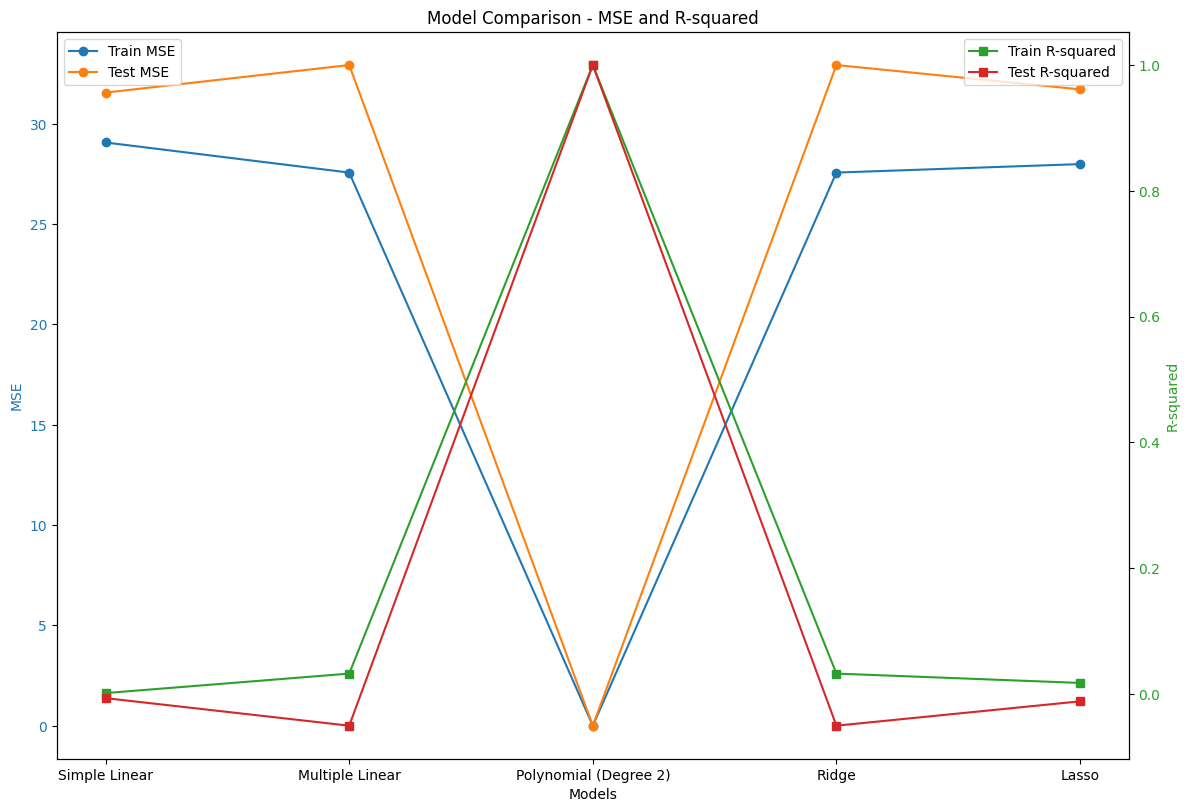

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='tab:blue')
ax1.plot(model_names, train_mse_values, label='Train MSE', color='tab:blue', marker='o')
ax1.plot(model_names, test_mse_values, label='Test MSE', color='tab:orange', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('R-squared', color='tab:green')
ax2.plot(model_names, train_r2_values, label='Train R-squared', color='tab:green', marker='s')
ax2.plot(model_names, test_r2_values, label='Test R-squared', color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.title('Model Comparison - MSE and R-squared')
plt.show()